# Cosmic Error: exactly how much does a slightly different H$_0$ and matter density matter?

In [1]:
%matplotlib inline

from astropy.io import fits
from glob import glob
import astropy.units as u
import astropy.constants as co
import astropy.cosmology as cosm
import numpy as np

import matplotlib.pylab as plt

In [2]:
plt.style.use('ggplot')

Here are our contenders:

In [3]:
def dl_wmap(z):
    wmap = cosm.WMAP9
    dl = wmap.luminosity_distance(z)
    return(dl)

def dl_LCDM(z):
    LCDM = cosm.LambdaCDM(70,.3,.7)
    dl = LCDM.luminosity_distance(z)
    return(dl)

Our initial redshift range:

In [4]:
zed = np.arange(0.01,5,0.1)

Our luminosity distances:

In [5]:
DL_WMAP, DL_LCDM = [], []

for ii in range(len(zed)):
    DL_WMAP.append(dl_wmap(zed[ii]).value)
    DL_LCDM.append(dl_LCDM(zed[ii]).value)
DL_WMAP = np.array(DL_WMAP)
DL_LCDM = np.array(DL_LCDM)

Our results, plotted:

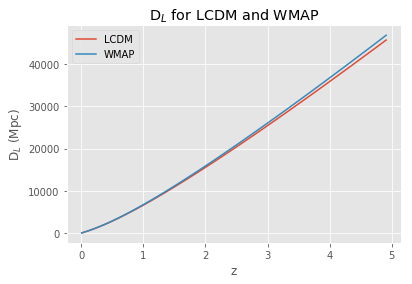

In [6]:
plt.plot(zed, DL_LCDM, label='LCDM')
plt.plot(zed, DL_WMAP, label='WMAP')
plt.xlabel('z')
plt.ylabel('D$_L$ (Mpc)')
plt.legend()
plt.title('D$_L$ for LCDM and WMAP')
plt.savefig('./py_files/lum_dist.png');

Now for the more interesting comparison for our purposes:

In [7]:
difference_quantified = 100*(1-DL_LCDM/DL_WMAP)

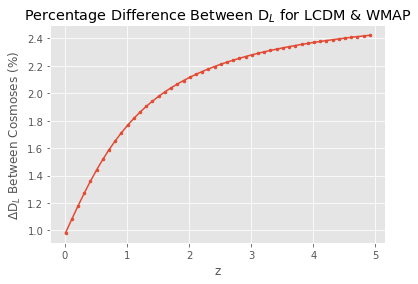

In [8]:
plt.plot(zed, difference_quantified, '-o', markersize=2.5)
plt.xlabel('z')
plt.ylabel('$\Delta$D$_L$ Between Cosmoses (%)')
plt.title('Percentage Difference Between D$_L$ for LCDM & WMAP')
plt.savefig('./py_files/cosmicerror1.png');

That's an interesting function! Not quite what I was anticipating.

Some stats:

In [9]:
std, mean, median = np.std(difference_quantified), np.mean(difference_quantified), np.median(difference_quantified)

In [10]:
'Mean {0:.2f}% difference between our LCDM & WMAP.'.format(mean)

'Mean 2.05% difference between our LCDM & WMAP.'

In [11]:
'Std. dev. of {0:.2f}%, median of {1:.1f}% difference between our LCDM & WMAP.'.format(std, median)

'Std. dev. of 0.39%, median of 2.2% difference between our LCDM & WMAP.'

# The difference turned out to be more interesting than I'd expected, so now we'll take it further:

In [12]:
# same process as before, just with a larger redshift range:

zed = np.arange(0.01,15,0.01) # and more points too!
DL_WMAP, DL_LCDM = [], []

for ii in range(len(zed)):
    DL_WMAP.append(dl_wmap(zed[ii]).value)
    DL_LCDM.append(dl_LCDM(zed[ii]).value)

DL_WMAP = np.array(DL_WMAP)
DL_LCDM = np.array(DL_LCDM)
difference_quantified = 100*(1-DL_LCDM/DL_WMAP)

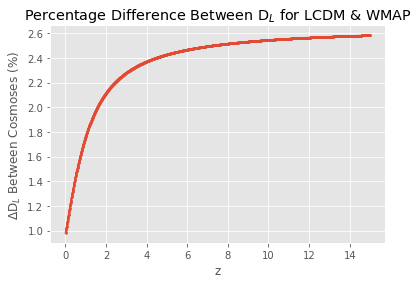

In [13]:
plt.plot(zed, difference_quantified, '-o', markersize=1.5)
plt.xlabel('z')
plt.ylabel('$\Delta$D$_L$ Between Cosmoses (%)')
plt.title('Percentage Difference Between D$_L$ for LCDM & WMAP')
plt.savefig('./py_files/cosmicerror2.png');

In [14]:
std, mean, median = np.std(difference_quantified), np.mean(difference_quantified), np.median(difference_quantified)
print(str(std)+'%,', str(mean)+'%,', str(median)+'%')

0.311848796826666%, 2.3761588925689825%, 2.505548270383018%


# Now to go <i>really</i> hard:

In [15]:
zed = np.arange(0.01,30000,0.1)

In [16]:
DL_WMAP = np.zeros([len(zed)])
DL_WMAP = DL_WMAP+np.array(zed)
DL_WMAP = dl_wmap(DL_WMAP).value

In [17]:
DL_LCDM = np.zeros([len(zed)])
DL_LCDM = DL_LCDM+np.array(zed)
DL_LCDM = dl_LCDM(DL_LCDM).value

In [18]:
# note: look at how much faster python can process LCDM versus WMAP object

In [19]:
difference_quantified = 100*(1-DL_LCDM/DL_WMAP)

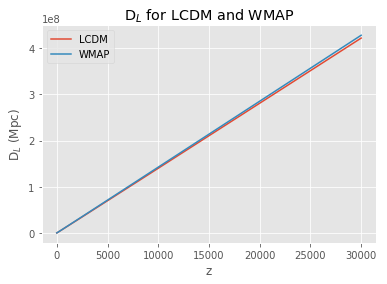

In [20]:
plt.plot(zed, DL_LCDM, label='LCDM')
plt.plot(zed, DL_WMAP, label='WMAP')
plt.xlabel('z')
plt.ylabel('D$_L$ (Mpc)')
plt.legend()
plt.title('D$_L$ for LCDM and WMAP');

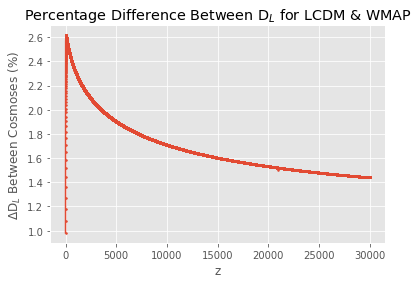

In [21]:
plt.plot(zed, difference_quantified, '-o', markersize=1.5)
plt.xlabel('z')
plt.ylabel('$\Delta$D$_L$ Between Cosmoses (%)')
plt.title('Percentage Difference Between D$_L$ for LCDM & WMAP')
plt.savefig('./py_files/lol.png');

# Note to whoever: don't run these cells it'll take forever

In [31]:
zed = np.arange(0.01,10**6,1)

DL_WMAP = np.zeros([len(zed)])
DL_WMAP = DL_WMAP+np.array(zed)
DL_WMAP = dl_wmap(DL_WMAP).value

DL_LCDM = np.zeros([len(zed)])
DL_LCDM = DL_LCDM+np.array(zed)
DL_LCDM = dl_LCDM(DL_LCDM).value

difference_quantified = 100*(1-DL_LCDM/DL_WMAP)
log_zed = np.log(zed)

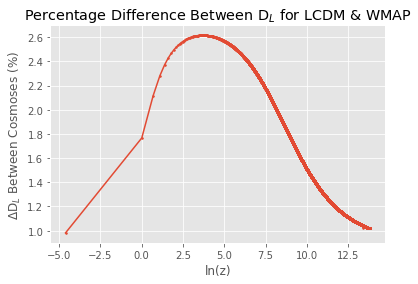

In [32]:
plt.plot(log_zed, difference_quantified, '-o', markersize=1.5)
plt.xlabel('ln(z)')
plt.ylabel('$\Delta$D$_L$ Between Cosmoses (%)')
plt.title('Percentage Difference Between D$_L$ for LCDM & WMAP');

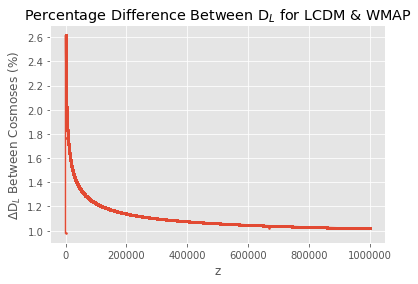

In [33]:
plt.plot(zed, difference_quantified, '-o', markersize=1.5)
plt.xlabel('z')
plt.ylabel('$\Delta$D$_L$ Between Cosmoses (%)')
plt.title('Percentage Difference Between D$_L$ for LCDM & WMAP');